# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys_booth import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# API URL and Units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Initialize Data Storage
city_data = []

# Logger Messages
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Initialize Counters
record_count = 1
set_count = 1

# Fetch Weather Data for Each City
for i, city in enumerate(cities[0:50]):
        
    # Group Cities in Sets of 50 for Logging
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create Endpoint URL with Each City
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log URL, Record, and Set Numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Increment Record Count
    record_count += 1

    # API Request for Each City
    try:
        # Send Request and Get Response
        response = requests.get(city_url)
        
        # Check Response Status
        status_code = response.status_code
        
        # Parse JSON if Response is Successful
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {}  # Failed Request

        # Extract Required Data
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        city_pressure = city_weather.get("main", {}).get("pressure")  # Additional Data

        # Append City Information to List
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Pressure": city_pressure,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # Handle Errors
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass

    # Delay for API Rate Limits
    time.sleep(1)
              
# Data Retrieval Completion Message
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | petropavlovsk-kamchatsky
Processing Record 2 of Set 1 | itoman
Processing Record 3 of Set 1 | kingston
Processing Record 4 of Set 1 | impfondo
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | al jubayl
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | bardai
Processing Record 15 of Set 1 | koungou
Processing Record 16 of Set 1 | san antonio de pale
Processing Record 17 of Set 1 | smara
Processing Record 18 of Set 1 | stornoway
Processing Record 19 of Set 1 | st. john's
Processing Record 20 of Set 1 | antsiranana
Processing Record 21 of Set 1 | flying fish cove
Processing Record 22 of Se

In [8]:
# Convert Data to DataFrame
city_data_df = pd.DataFrame(city_data)

# Display Record Count
city_data_df.count()


City          50
Lat           50
Lng           50
Max Temp      50
Humidity      50
Pressure      50
Cloudiness    50
Wind Speed    50
Country       50
Date          50
dtype: int64

In [9]:
# Display sample data 
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatsky,53.0452,158.6483,48.79,89,1019,75,15.66,RU,1718602124
1,itoman,26.1247,127.6694,83.17,91,1010,75,11.50,JP,1718602126
2,kingston,17.9970,-76.7936,83.35,79,1013,20,17.27,JM,1718602127
3,impfondo,1.6381,18.0667,71.49,96,1013,95,1.92,CG,1718602128
4,grytviken,-54.2811,-36.5092,24.93,86,992,27,8.01,GS,1718602129


In [21]:
# Read saved data
city_data_df = pd.read_csv("cities_booth.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,48.79,89,1019,75,15.66,RU,1718602124
1,itoman,26.1247,127.6694,83.17,91,1010,75,11.50,JP,1718602126
2,kingston,17.9970,-76.7936,83.35,79,1013,20,17.27,JM,1718602127
3,impfondo,1.6381,18.0667,71.49,96,1013,95,1.92,CG,1718602128
4,grytviken,-54.2811,-36.5092,24.93,86,992,27,8.01,GS,1718602129


In [23]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        50 non-null     object 
 1   Lat         50 non-null     float64
 2   Lng         50 non-null     float64
 3   Max Temp    50 non-null     float64
 4   Humidity    50 non-null     int64  
 5   Pressure    50 non-null     int64  
 6   Cloudiness  50 non-null     int64  
 7   Wind Speed  50 non-null     float64
 8   Country     50 non-null     object 
 9   Date        50 non-null     int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 4.3+ KB


In [23]:
# Drop the na
df = city_data_df.dropna(how="any").reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     48 non-null     int64  
 1   City        48 non-null     object 
 2   Lat         48 non-null     float64
 3   Lng         48 non-null     float64
 4   Max Temp    48 non-null     float64
 5   Humidity    48 non-null     float64
 6   Pressure    48 non-null     float64
 7   Cloudiness  48 non-null     float64
 8   Wind Speed  48 non-null     float64
 9   Country     48 non-null     object 
 10  Date        48 non-null     float64
dtypes: float64(8), int64(1), object(2)
memory usage: 4.2+ KB


#### Latitude Vs. Cloudiness

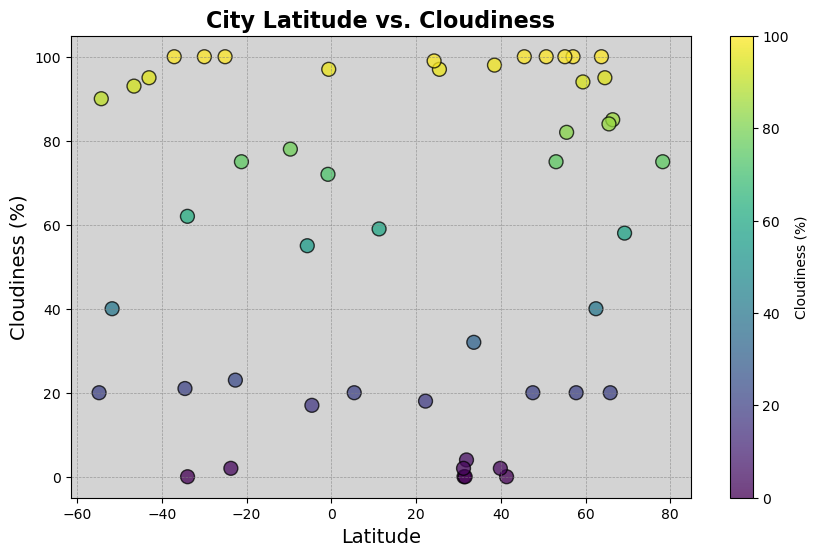

In [31]:
import matplotlib.pyplot as plt
import os

# Build the scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
scatter = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], 
                      c=city_data_df["Cloudiness"], cmap='viridis', 
                      edgecolors="black", linewidths=1, marker="o", s=100, alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness", fontsize=16, fontweight='bold')
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.colorbar(scatter, label='Cloudiness (%)')
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the grid and background
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor('lightgray')

# Create output directory if it does not exist
output_dir = "../output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the figure
plt.savefig(f"{output_dir}/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

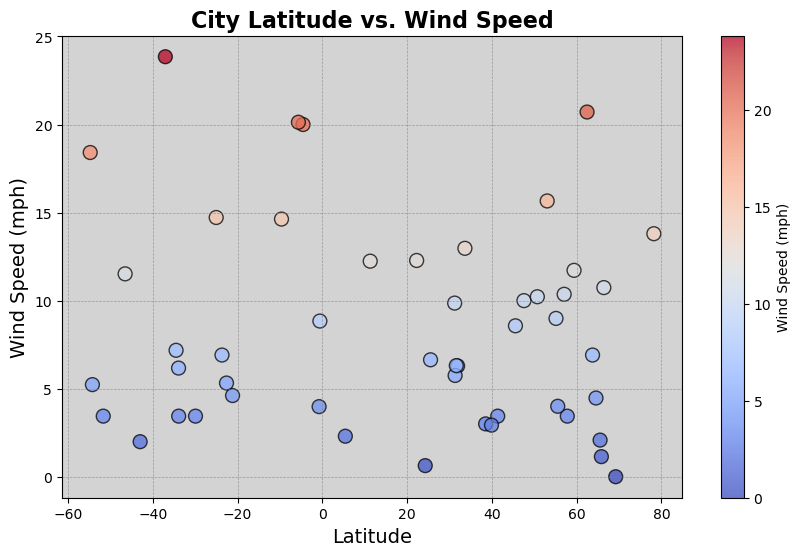

In [32]:

# Build the scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 6))
scatter = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], 
                      c=city_data_df["Wind Speed"], cmap='coolwarm', 
                      edgecolors="black", linewidths=1, marker="o", s=100, alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=16, fontweight='bold')
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.colorbar(scatter, label='Wind Speed (mph)')
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the grid and background
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor('lightgray')

# Create output directory if it does not exist
output_dir = "../output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the figure
plt.savefig(f"{output_dir}/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def doRegression(x_values, y_values, x_title, y_title, annotation_pos):
    # Calculate the linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept  # Calculate the predictions
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Equation of the line

    # Create the plot
    plt.figure(figsize=(10, 6))  # Step 2: Make the canvas

    # Step 3: Make the basic plot
    plt.scatter(x_values, y_values, facecolor="firebrick", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-")  # Plot the line of best fit

    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="red")

    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2:.3f}")

    # Show the plot
    plt.show()


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df.loc[df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
1,1,utrik,11.2278,169.8474,82.33,79.0,1013.0,100.0,10.58,MH,1.717108e+09
2,2,sitka,57.0531,-135.3300,53.49,58.0,1023.0,100.0,8.05,US,1.717108e+09
3,3,aasiaat,68.7098,-52.8699,30.34,67.0,1015.0,19.0,6.06,GL,1.717108e+09
4,4,st. paul,44.9444,-93.0933,78.58,43.0,1017.0,20.0,16.11,US,1.717108e+09
5,5,stanley,54.8680,-1.6985,51.71,82.0,1017.0,0.0,13.80,GB,1.717108e+09


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df.loc[df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,0,edinburgh of the seven seas,-37.0676,-12.3116,53.74,56.0,1033.0,66.0,8.95,SH,1.717108e+09
6,6,karratha,-20.7377,116.8463,68.43,70.0,1016.0,0.0,10.29,AU,1.717108e+09
7,7,saint-pierre,-21.3393,55.4781,73.08,83.0,1019.0,75.0,23.02,RE,1.717108e+09
8,8,port-aux-francais,-49.3500,70.2167,37.69,74.0,1006.0,24.0,34.43,TF,1.717108e+09
10,10,adamstown,-25.0660,-130.1015,71.28,81.0,1014.0,52.0,20.38,PN,1.717108e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.554


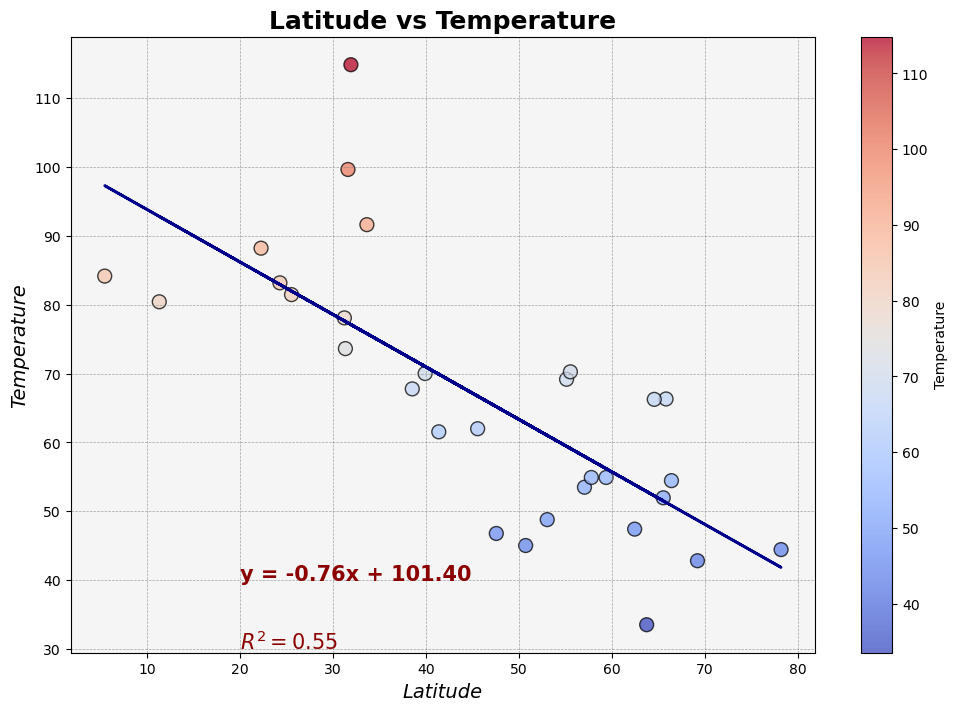

In [42]:
# Define a function to create Linear Regression plots
def doRegression(x_values, y_values, x_title, y_title, annotation_pos):
    # Calculate the linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept  # Calculate the predictions
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Equation of the line

    # Create the plot
    plt.figure(figsize=(12, 8))  # Step 2: Make the canvas

    # Step 3: Make the basic plot with colormap
    scatter = plt.scatter(x_values, y_values, c=y_values, cmap='coolwarm', edgecolor='black', s=100, alpha=0.75)
    plt.plot(x_values, regress_values, color='darkblue', linestyle='-', linewidth=2)  # Plot the line of best fit

    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=14, fontstyle='italic')
    plt.ylabel(y_title, fontsize=14, fontstyle='italic')
    plt.title(f"{x_title} vs {y_title}", fontweight='bold', fontsize=18)
    plt.colorbar(scatter, label=y_title)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.gca().set_facecolor('whitesmoke')
    
    # Add equation annotation
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="darkred", fontweight='bold')
    
    # Add r-squared annotation
    plt.annotate(f"$R^2 = {rvalue**2:.2f}$", (annotation_pos[0], annotation_pos[1]-10), fontsize=15, color="darkred", fontweight='bold')

    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2:.3f}")

    # Show the plot
    plt.show()

# Assuming northern_hemi_df is already defined and contains the relevant data
# If not, you would need to create it, for example:
# northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (20, 40))


The r-squared is: 0.726


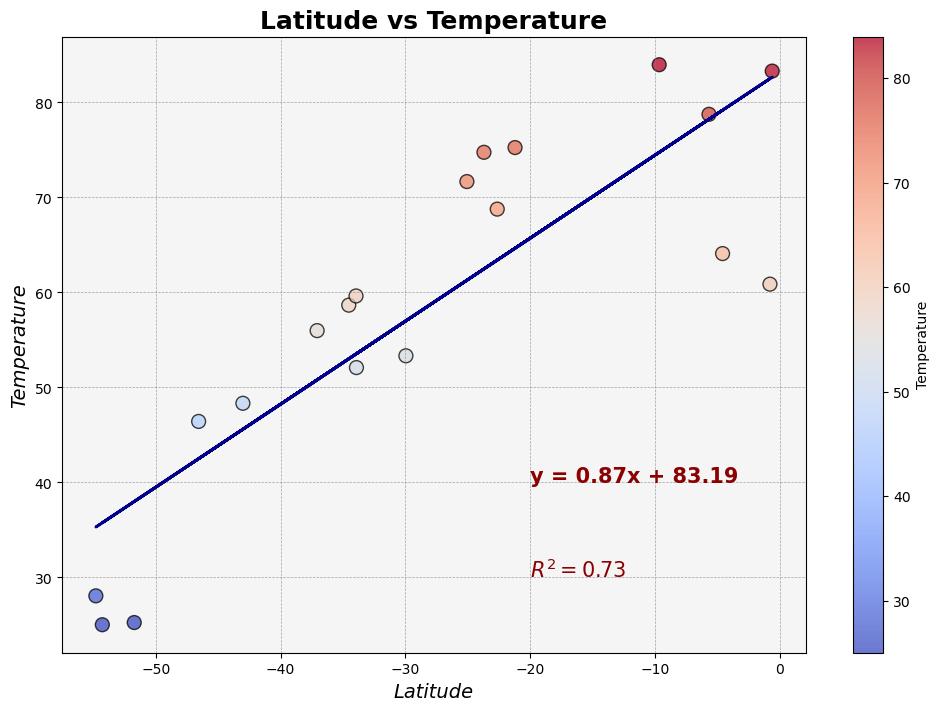

In [39]:
# Define a function to create Linear Regression plots
def doRegression(x_values, y_values, x_title, y_title, annotation_pos):
    # Calculate the linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept  # Calculate the predictions
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Equation of the line

    # Create the plot
    plt.figure(figsize=(12, 8))  # Step 2: Make the canvas

    # Step 3: Make the basic plot with colormap
    scatter = plt.scatter(x_values, y_values, c=y_values, cmap='coolwarm', edgecolor='black', s=100, alpha=0.75)
    plt.plot(x_values, regress_values, color='darkblue', linestyle='-', linewidth=2)  # Plot the line of best fit

    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=14, fontstyle='italic')
    plt.ylabel(y_title, fontsize=14, fontstyle='italic')
    plt.title(f"{x_title} vs {y_title}", fontweight='bold', fontsize=18)
    plt.colorbar(scatter, label=y_title)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.gca().set_facecolor('whitesmoke')
    
    # Add equation annotation
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="darkred", fontweight='bold')
    
    # Add r-squared annotation
    plt.annotate(f"$R^2 = {rvalue**2:.2f}$", (annotation_pos[0], annotation_pos[1]-10), fontsize=15, color="darkred", fontweight='bold')

    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2:.3f}")

    # Show the plot
    plt.show()

# Assuming city_data_df is already defined and populated
# Create a DataFrame for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (-20, 40))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.004


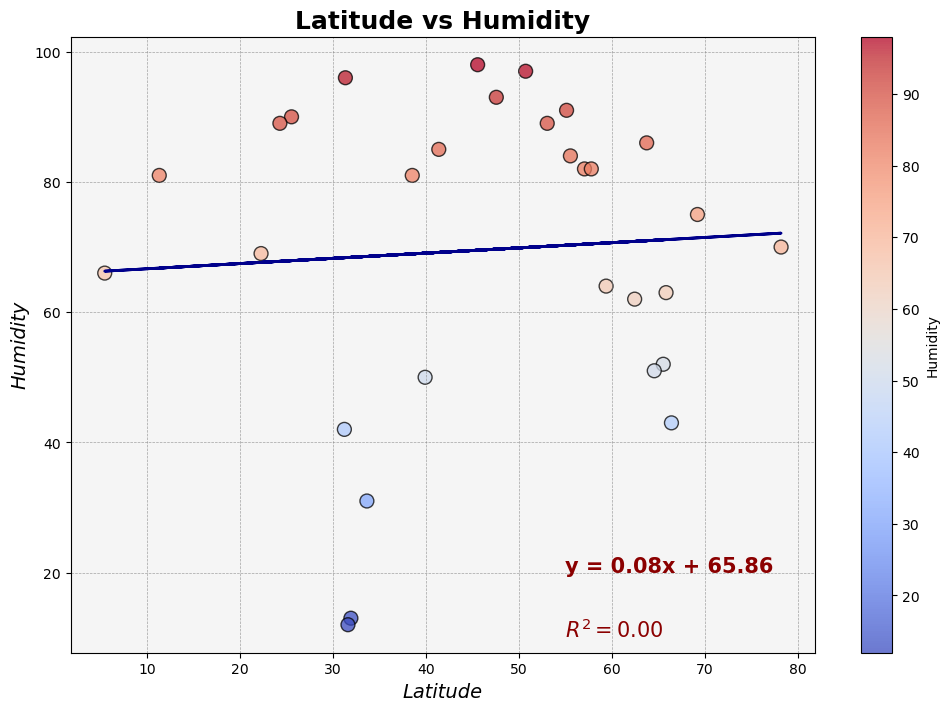

In [40]:
# Define a function to create Linear Regression plots
def doRegression(x_values, y_values, x_title, y_title, annotation_pos):
    # Calculate the linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept  # Calculate the predictions
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Equation of the line

    # Create the plot
    plt.figure(figsize=(12, 8))  # Step 2: Make the canvas

    # Step 3: Make the basic plot with colormap
    scatter = plt.scatter(x_values, y_values, c=y_values, cmap='coolwarm', edgecolor='black', s=100, alpha=0.75)
    plt.plot(x_values, regress_values, color='darkblue', linestyle='-', linewidth=2)  # Plot the line of best fit

    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=14, fontstyle='italic')
    plt.ylabel(y_title, fontsize=14, fontstyle='italic')
    plt.title(f"{x_title} vs {y_title}", fontweight='bold', fontsize=18)
    plt.colorbar(scatter, label=y_title)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.gca().set_facecolor('whitesmoke')
    
    # Add equation annotation
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="darkred", fontweight='bold')
    
    # Add r-squared annotation
    plt.annotate(f"$R^2 = {rvalue**2:.2f}$", (annotation_pos[0], annotation_pos[1]-10), fontsize=15, color="darkred", fontweight='bold')

    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2:.3f}")

    # Show the plot
    plt.show()

# Assuming city_data_df is already defined and populated
# Create a DataFrame for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Linear regression on Northern Hemisphere for Latitude vs. Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humidity", (55, 20))


The r-squared is: 0.037


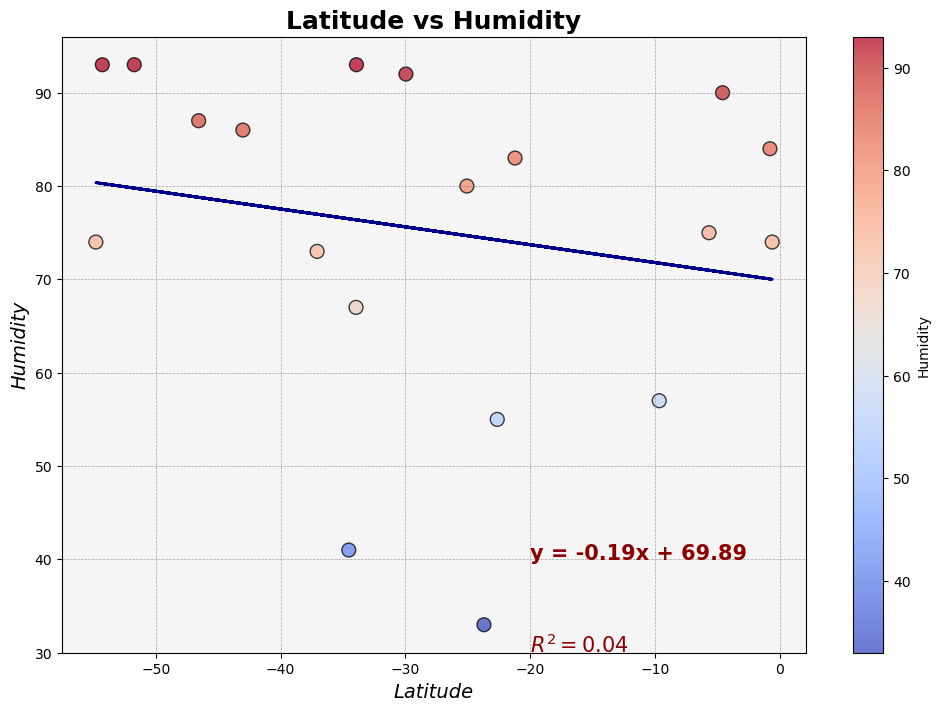

In [41]:
# Define a function to create Linear Regression plots
def doRegression(x_values, y_values, x_title, y_title, annotation_pos):
    # Calculate the linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept  # Calculate the predictions
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Equation of the line

    # Create the plot
    plt.figure(figsize=(12, 8))  # Step 2: Make the canvas

    # Step 3: Make the basic plot with colormap
    scatter = plt.scatter(x_values, y_values, c=y_values, cmap='coolwarm', edgecolor='black', s=100, alpha=0.75)
    plt.plot(x_values, regress_values, color='darkblue', linestyle='-', linewidth=2)  # Plot the line of best fit

    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=14, fontstyle='italic')
    plt.ylabel(y_title, fontsize=14, fontstyle='italic')
    plt.title(f"{x_title} vs {y_title}", fontweight='bold', fontsize=18)
    plt.colorbar(scatter, label=y_title)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.gca().set_facecolor('whitesmoke')
    
    # Add equation annotation
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="darkred", fontweight='bold')
    
    # Add r-squared annotation
    plt.annotate(f"$R^2 = {rvalue**2:.2f}$", (annotation_pos[0], annotation_pos[1]-10), fontsize=15, color="darkred", fontweight='bold')

    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2:.3f}")

    # Show the plot
    plt.show()

# Assuming city_data_df is already defined and populated
# Create a DataFrame for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Linear regression on Southern Hemisphere for Latitude vs. Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humidity", (-20, 40))


In both hemispheres, the linear relationship between latitude and humidity appears to be weak based on the r-squared values and scatter plot analysis. This suggests that while latitude may have some influence on humidity, it is not a dominant factor. Other environmental and geographical factors play a more significant role in determining humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.142


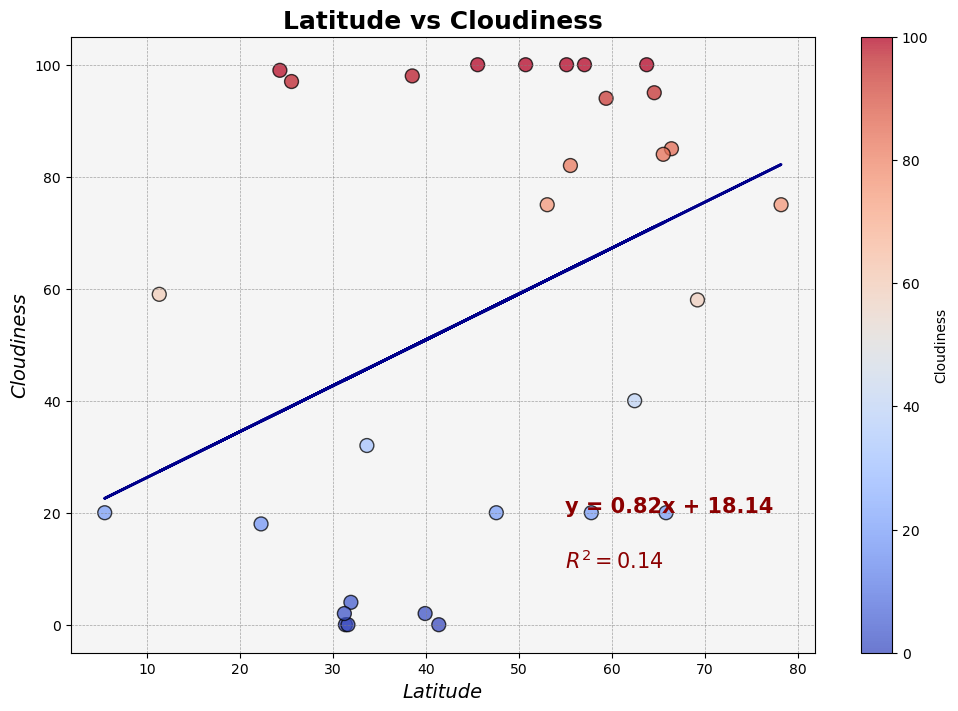

The r-squared is: 0.000


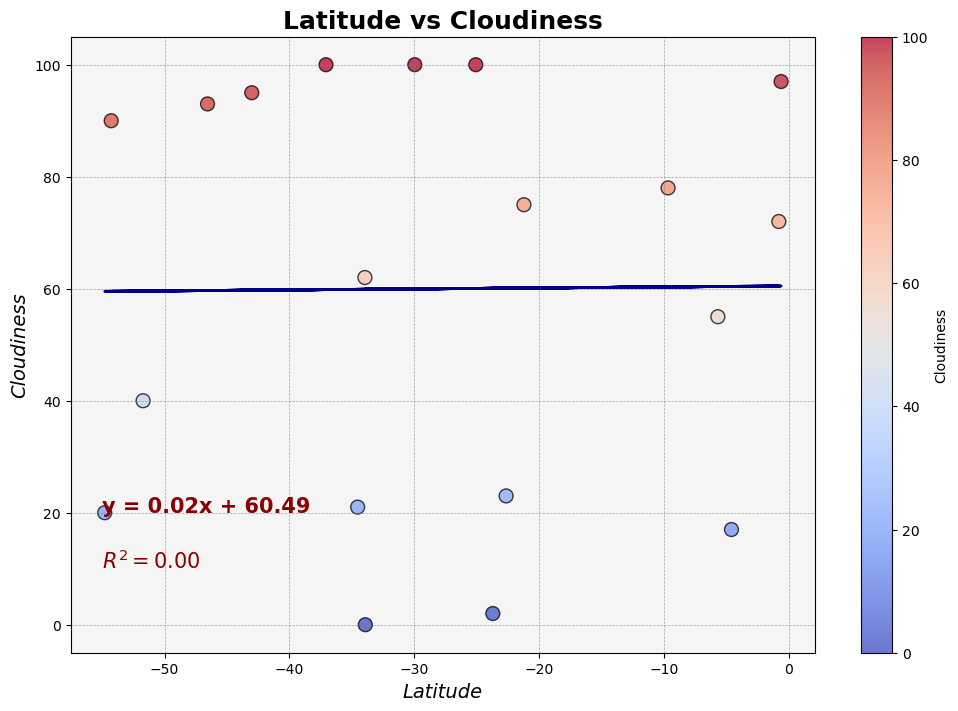

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def doRegression(x_values, y_values, x_title, y_title, annotation_pos):
    # Calculate the linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept  # Calculate the predictions
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Equation of the line

    # Create the plot
    plt.figure(figsize=(12, 8))  # Step 2: Make the canvas

    # Step 3: Make the basic plot with colormap
    scatter = plt.scatter(x_values, y_values, c=y_values, cmap='coolwarm', edgecolor='black', s=100, alpha=0.75)
    plt.plot(x_values, regress_values, color='darkblue', linestyle='-', linewidth=2)  # Plot the line of best fit

    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=14, fontstyle='italic')
    plt.ylabel(y_title, fontsize=14, fontstyle='italic')
    plt.title(f"{x_title} vs {y_title}", fontweight='bold', fontsize=18)
    plt.colorbar(scatter, label=y_title)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.gca().set_facecolor('whitesmoke')
    
    # Add equation annotation
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="darkred", fontweight='bold')
    
    # Add r-squared annotation
    plt.annotate(f"$R^2 = {rvalue**2:.2f}$", (annotation_pos[0], annotation_pos[1]-10), fontsize=15, color="darkred", fontweight='bold')

    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2:.3f}")

    # Show the plot
    plt.show()

# Assuming city_data_df is already defined and populated
# Create DataFrames for the Northern and Southern Hemispheres
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Northern Hemisphere: Cloudiness vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
doRegression(x_values, y_values, "Latitude", "Cloudiness", (55, 20))

# Southern Hemisphere: Cloudiness vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
doRegression(x_values, y_values, "Latitude", "Cloudiness", (-55, 20))


In both hemispheres, the linear relationship between latitude and cloudiness appears to be weak based on the r-squared values and scatter plot analysis. This suggests that while latitude may have some influence on cloudiness, it is not a dominant factor. Other environmental and geographical factors play a more significant role in determining cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.009


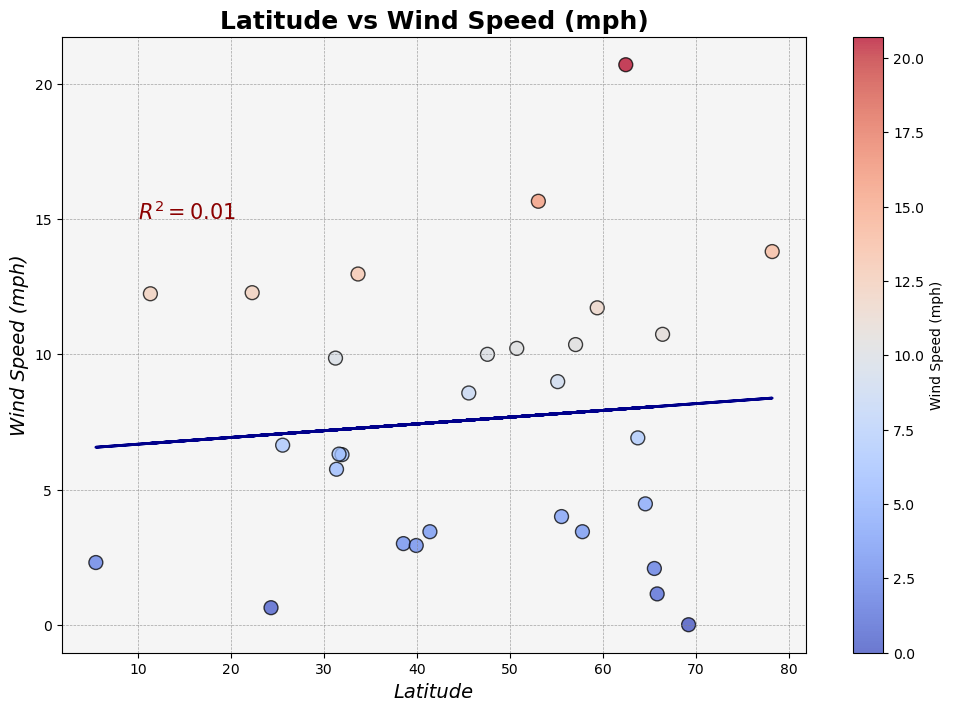

The r-squared is: 0.034


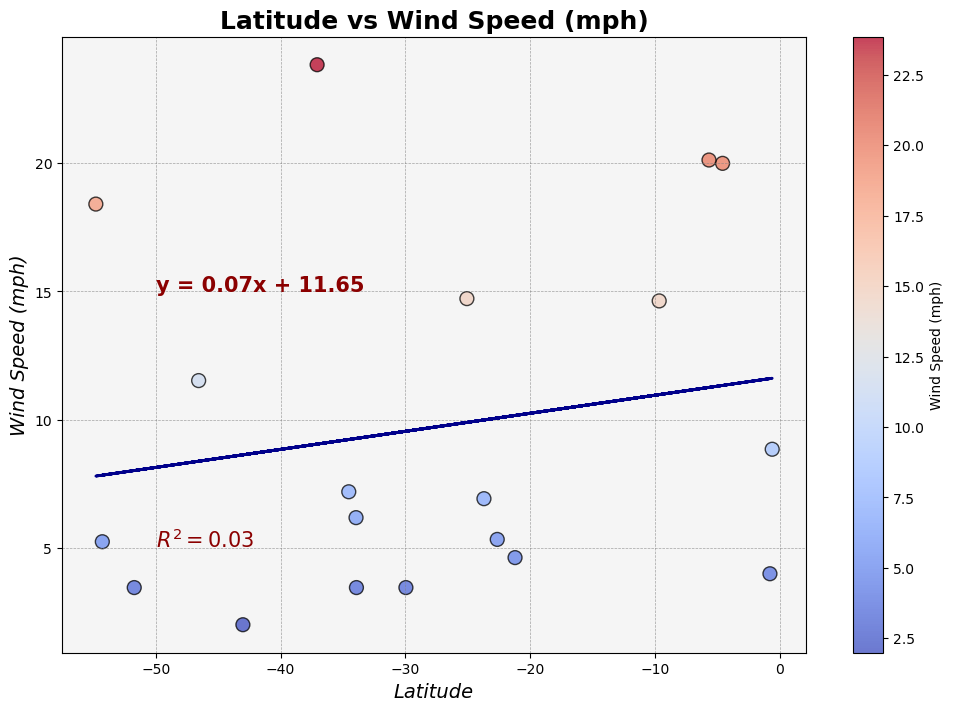

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def doRegression(x_values, y_values, x_title, y_title, annotation_pos):
    # Calculate the linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept  # Calculate the predictions
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Equation of the line

    # Create the plot
    plt.figure(figsize=(12, 8))  # Step 2: Make the canvas

    # Step 3: Make the basic plot with colormap
    scatter = plt.scatter(x_values, y_values, c=y_values, cmap='coolwarm', edgecolor='black', s=100, alpha=0.75)
    plt.plot(x_values, regress_values, color='darkblue', linestyle='-', linewidth=2)  # Plot the line of best fit

    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=14, fontstyle='italic')
    plt.ylabel(y_title, fontsize=14, fontstyle='italic')
    plt.title(f"{x_title} vs {y_title}", fontweight='bold', fontsize=18)
    plt.colorbar(scatter, label=y_title)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.gca().set_facecolor('whitesmoke')
    
    # Add equation annotation
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="darkred", fontweight='bold')
    
    # Add r-squared annotation
    plt.annotate(f"$R^2 = {rvalue**2:.2f}$", (annotation_pos[0], annotation_pos[1]-10), fontsize=15, color="darkred", fontweight='bold')

    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2:.3f}")

    # Show the plot
    plt.show()

# Assuming city_data_df is already defined and populated
# Create DataFrames for the Northern and Southern Hemispheres
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Northern Hemisphere: Wind Speed vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed (mph)", (10, 25))

# Southern Hemisphere: Wind Speed vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed (mph)", (-50, 15))


In [ ]:
In both hemispheres, the linear relationship between latitude and wind speed appears to be weak based on the r-squared values and scatter plot analysis. This suggests that while latitude may have some influence on wind speed, it is not a dominant factor. Other environmental and geographical factors are likely more significant in determining wind speed levels.